<a href="https://colab.research.google.com/github/Gmajorseven/training-data-sci/blob/main/lab7_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Polynomial Regression

สมการเชิงเส้นที่มีตัวแปรอิสระ (x) มากกว่า 1 ตัว และมีลักษณะโค้งงอ (ไม่เป็นเส้นตรง):

y = b<sub>0</sub> + b<sub>1</sub>x<sub>1</sub> + b<sub>2</sub>x<sup>2</sup> <sub>2</sub> + ... + b<sub>n</sub>x<sup>n</sup><sub>n</sub>

### Step 1: การจัดเตรียมข้อมูล

สมการเชิงเส้นที่มีตัวแปรอิสระ (x) มากกว่า 1 ตัว และมีลักษณะโค้งงอ (ไม่เป็นเส้นตรง):

y = b<sub>0</sub> + b<sub>1</sub>x<sub>1</sub> + b<sub>2</sub>x<sup>2</sup> <sub>2</sub> + ... + b<sub>n</sub>x<sup>n</sup><sub>n</sub> ประกอบด้วย ข้อมูลเข้า (x) มากกว่า 1 คอลัมน์ (2 มิติ) และผลลัพธ์ (y)

In [1]:
# ตัวอย่างนี้จะทำการสังเคราะห์ข้อมูลตัวอย่างขึ้นมาใช้งาน
import numpy as np

random_no = np.random.RandomState(1)
x = 10 * random_no.rand(50)
y = np.sin(x) + 0.1 * random_no.randn(50)

### Step 2: Data Visualization

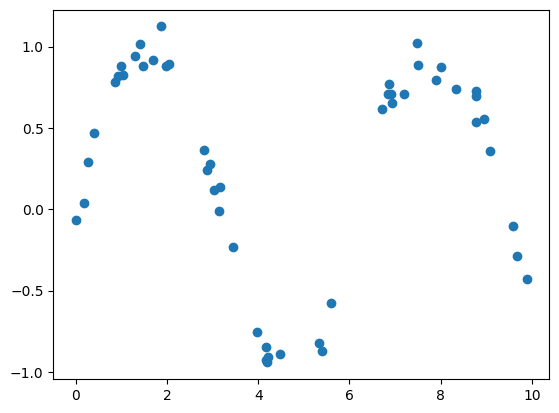

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(x, y)

### Step 3: Import Packages and Classes

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Step 4: สร้างแบบจำลอง (Model) และทำการฝึกสอน (fit)

In [14]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(degree=7), LinearRegression()) # ระบุ degree หมายถึงเลขยกกำลัง

In [15]:
model.fit(x[:, np.newaxis], y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])

### Step 5: การทำนายผลลัพธ์ (Prediction)

In [16]:
x_test = np.linspace(0, 10, 100) # ลองเปลี่ยนเลข 100 เป็น 10

In [17]:
y_test = model.predict(x_test[:, np.newaxis])

### Step 6: แสดงผลด้วยภาพ (Data Visualization)

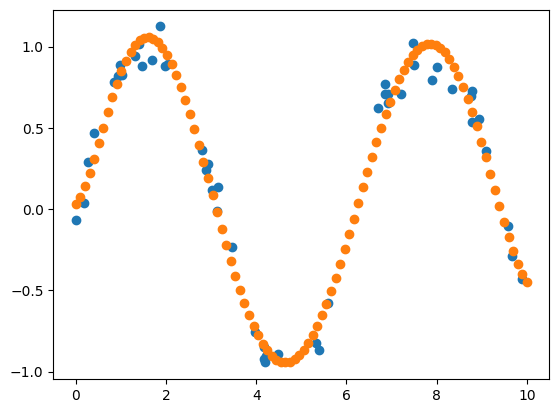

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(x, y)           # วาดจุด
plt.scatter(x_test, y_test) # วาดเส้น

### Step 7: การวัดประสิทธิภาพของแบบจำลอง

In [19]:
r2 = model.score(x[:, np.newaxis], y)

print(f'coefficient of determination: {r2}')  # ค่า R2 ใช้เพื่อวัดประสิทธิภาพของแบบจำลอง เข้าใกล้ 1 แปลว่า การทำนายจะ Fit กับข้อมูลมาก

coefficient of determination: 0.9760274753833502


### Step 8: การนำแบบจำลองไปใช้ที่อื่น

เราสามารทำได้โโดย นำค่าสัมประสิทธิ์ (Coefficient) / ค่าน้ำหนัก (Weight) ของสมการเชิงเส้นที่แบบจำลองสร้างไว้ ไปใช้โดยไม่ต้องมี Python ได้

In [20]:
model.get_params # degree=7 คือ สัมประสิทธิ์ยกกำลัง 7: (b1 - b7)

<bound method Pipeline.get_params of Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=7)),
                ('linearregression', LinearRegression())])>

In [21]:
model.named_steps['linearregression'].intercept_

0.028472625965625498

In [22]:
model.named_steps['linearregression'].coef_ # ค่า model.coef_ คือ ค่า coefficient ของ b1 - b7 (ยกกำลัง 7)

array([ 0.00000000e+00,  3.31250194e-01,  1.28845778e+00, -1.06474496e+00,
        2.90659230e-01, -3.57011703e-02,  2.01614685e-03, -4.20513337e-05])